In [1]:
from google.colab import drive
drive.mount("/content/drive/")

import os
if os.path.exists('/content/drive/MyDrive/COMS_6998'):
     os.chdir('/content/drive/MyDrive/COMS_6998')
print("current working directory:", os.getcwd())

Mounted at /content/drive/
current working directory: /content/drive/MyDrive/COMS_6998


In [2]:
# Libraries
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load data files
# country level data
df_country = pd.read_csv("yield_and_climate_data_by_country.csv")
countries = pd.read_csv("countries.csv")
# region level data
# df_region = pd.read_csv("yield_and_climate_data_by_region.csv")
# regions = pd.read_csv("regions.csv")

variables = ['cloud_cover', 'snow_thickness', 'vapour_pressure', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']
months = ['01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12']

label_encoder = LabelEncoder()
df_country["Country_cat"] = label_encoder.fit_transform(df_country["Country"])

Country level data

In [4]:
#Dataset info
df_country.info

<bound method DataFrame.info of               Country  Year  Area harvested   Yield  Production  \
0              Angola  1979           18000   90000      162000   
1              Angola  1980           18000   91667      165000   
2              Angola  1981           18000   91667      165000   
3              Angola  1982           18000   91667      165000   
4              Angola  1983           18000   91667      165000   
..                ...   ...             ...     ...         ...   
786            Rwanda  2020          179555   71043     1275614   
787             Kenya  2020           54007  126963      685687   
788             Japan  2020           33100  207734      687600   
789            Brazil  2020           59481  142549      847896   
790  Papua New Guinea  2020          134868   50927      686843   

     cloud_cover_01  snow_thickness_01  vapour_pressure_01  2m_temperature_01  \
0          0.894028           0.000000           21.430315         294.640198   
1

In [5]:
#Summary statistics
print(df_country.describe().round(2))

          Year  Area harvested      Yield    Production  cloud_cover_01  \
count   791.00          791.00     791.00  7.910000e+02          791.00   
mean   1999.90       422198.89   97764.40  5.917103e+06            0.57   
std      12.13      1181836.30   64908.42  2.146480e+07            0.20   
min    1979.00         1800.00   10448.00  1.012700e+04            0.16   
25%    1989.50        46425.50   50179.00  4.500000e+05            0.43   
50%    2000.00       100000.00   80000.00  8.365600e+05            0.55   
75%    2010.00       201946.50  120828.50  1.605069e+06            0.74   
max    2020.00      8641000.00  420259.00  1.259250e+08            0.94   

       snow_thickness_01  vapour_pressure_01  2m_temperature_01  \
count             791.00              791.00             791.00   
mean                1.43               16.51             292.36   
std                 3.62                7.26               8.94   
min                 0.00                2.97            

In [6]:
#Data points by year and by country
print(df_country[["Country", "Year"]].groupby("Year").count())
print(df_country[["Country", "Year"]].groupby("Country").count())

      Country
Year         
1979       18
1980       18
1981       18
1982       18
1983       18
1984       18
1985       18
1986       18
1987       18
1988       18
1989       18
1990       18
1991       18
1992       18
1993       19
1994       19
1995       19
1996       19
1997       19
1998       19
1999       19
2000       19
2001       19
2002       19
2003       19
2004       19
2005       19
2006       19
2007       19
2008       19
2009       19
2010       19
2011       19
2012       19
2013       19
2014       20
2015       20
2016       20
2017       20
2018       20
2019       20
2020       20
                             Year
Country                          
Angola                         42
Brazil                         42
China                          42
Ethiopia                       28
Haiti                          42
India                          42
Indonesia                      42
Japan                          42
Kenya                          42
Madagascar

In [7]:
#Aggregating monthly aggregates into 3 month groups and annual aggregates
for variable in variables:
    for i in range(4):
        df_country[variable+"_g"+str(i)] = df_country[[variable+"_"+months[3*i], variable+"_"+months[3*i+1], variable+"_"+months[3*i+2]]].mean(axis=1) 
    df_country[variable] = df_country[[variable+"_g0", variable+"_g1", variable+"_g2", variable+"_g3"]].mean(axis= 1)

In [8]:
print(df_country[variables].describe().round(2))

       cloud_cover  snow_thickness  vapour_pressure  2m_temperature  \
count       791.00          791.00           791.00          791.00   
mean          0.58            0.64            18.64          294.74   
std           0.12            1.47             4.32            4.73   
min           0.33            0.00            10.12          269.01   
25%           0.47            0.00            16.28          294.98   
50%           0.59            0.00            18.49          295.82   
75%           0.65            0.12            21.45          297.56   
max           0.86            8.56            28.31          301.48   

       10m_wind_speed  2m_dewpoint_temperature  
count          791.00                   791.00  
mean             2.62                   287.81  
std              0.61                     4.90  
min              1.57                   276.24  
25%              2.11                   286.56  
50%              2.57                   288.80  
75%              

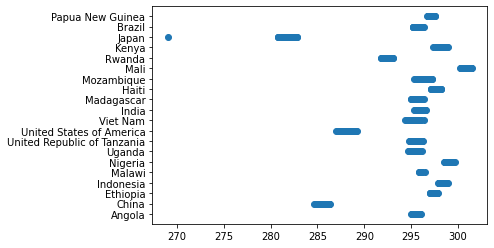

In [19]:
plt.scatter(df_country["2m_temperature"], df_country["Country"])
plt.show()

In [9]:
x_vars = ["Country_cat", "Production", "Yield", "Area harvested"] + variables

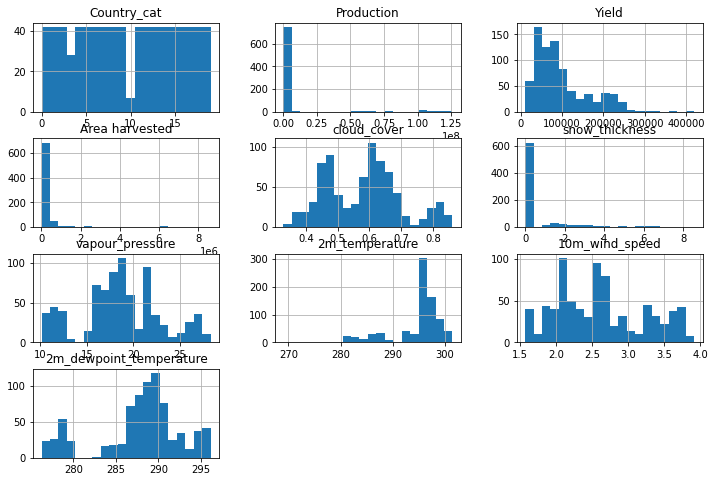

In [10]:
#Distribution of variables using annual aggregates
df_country[x_vars].hist(figsize=(12,8),bins=20)
plt.show()

<Figure size 720x432 with 0 Axes>

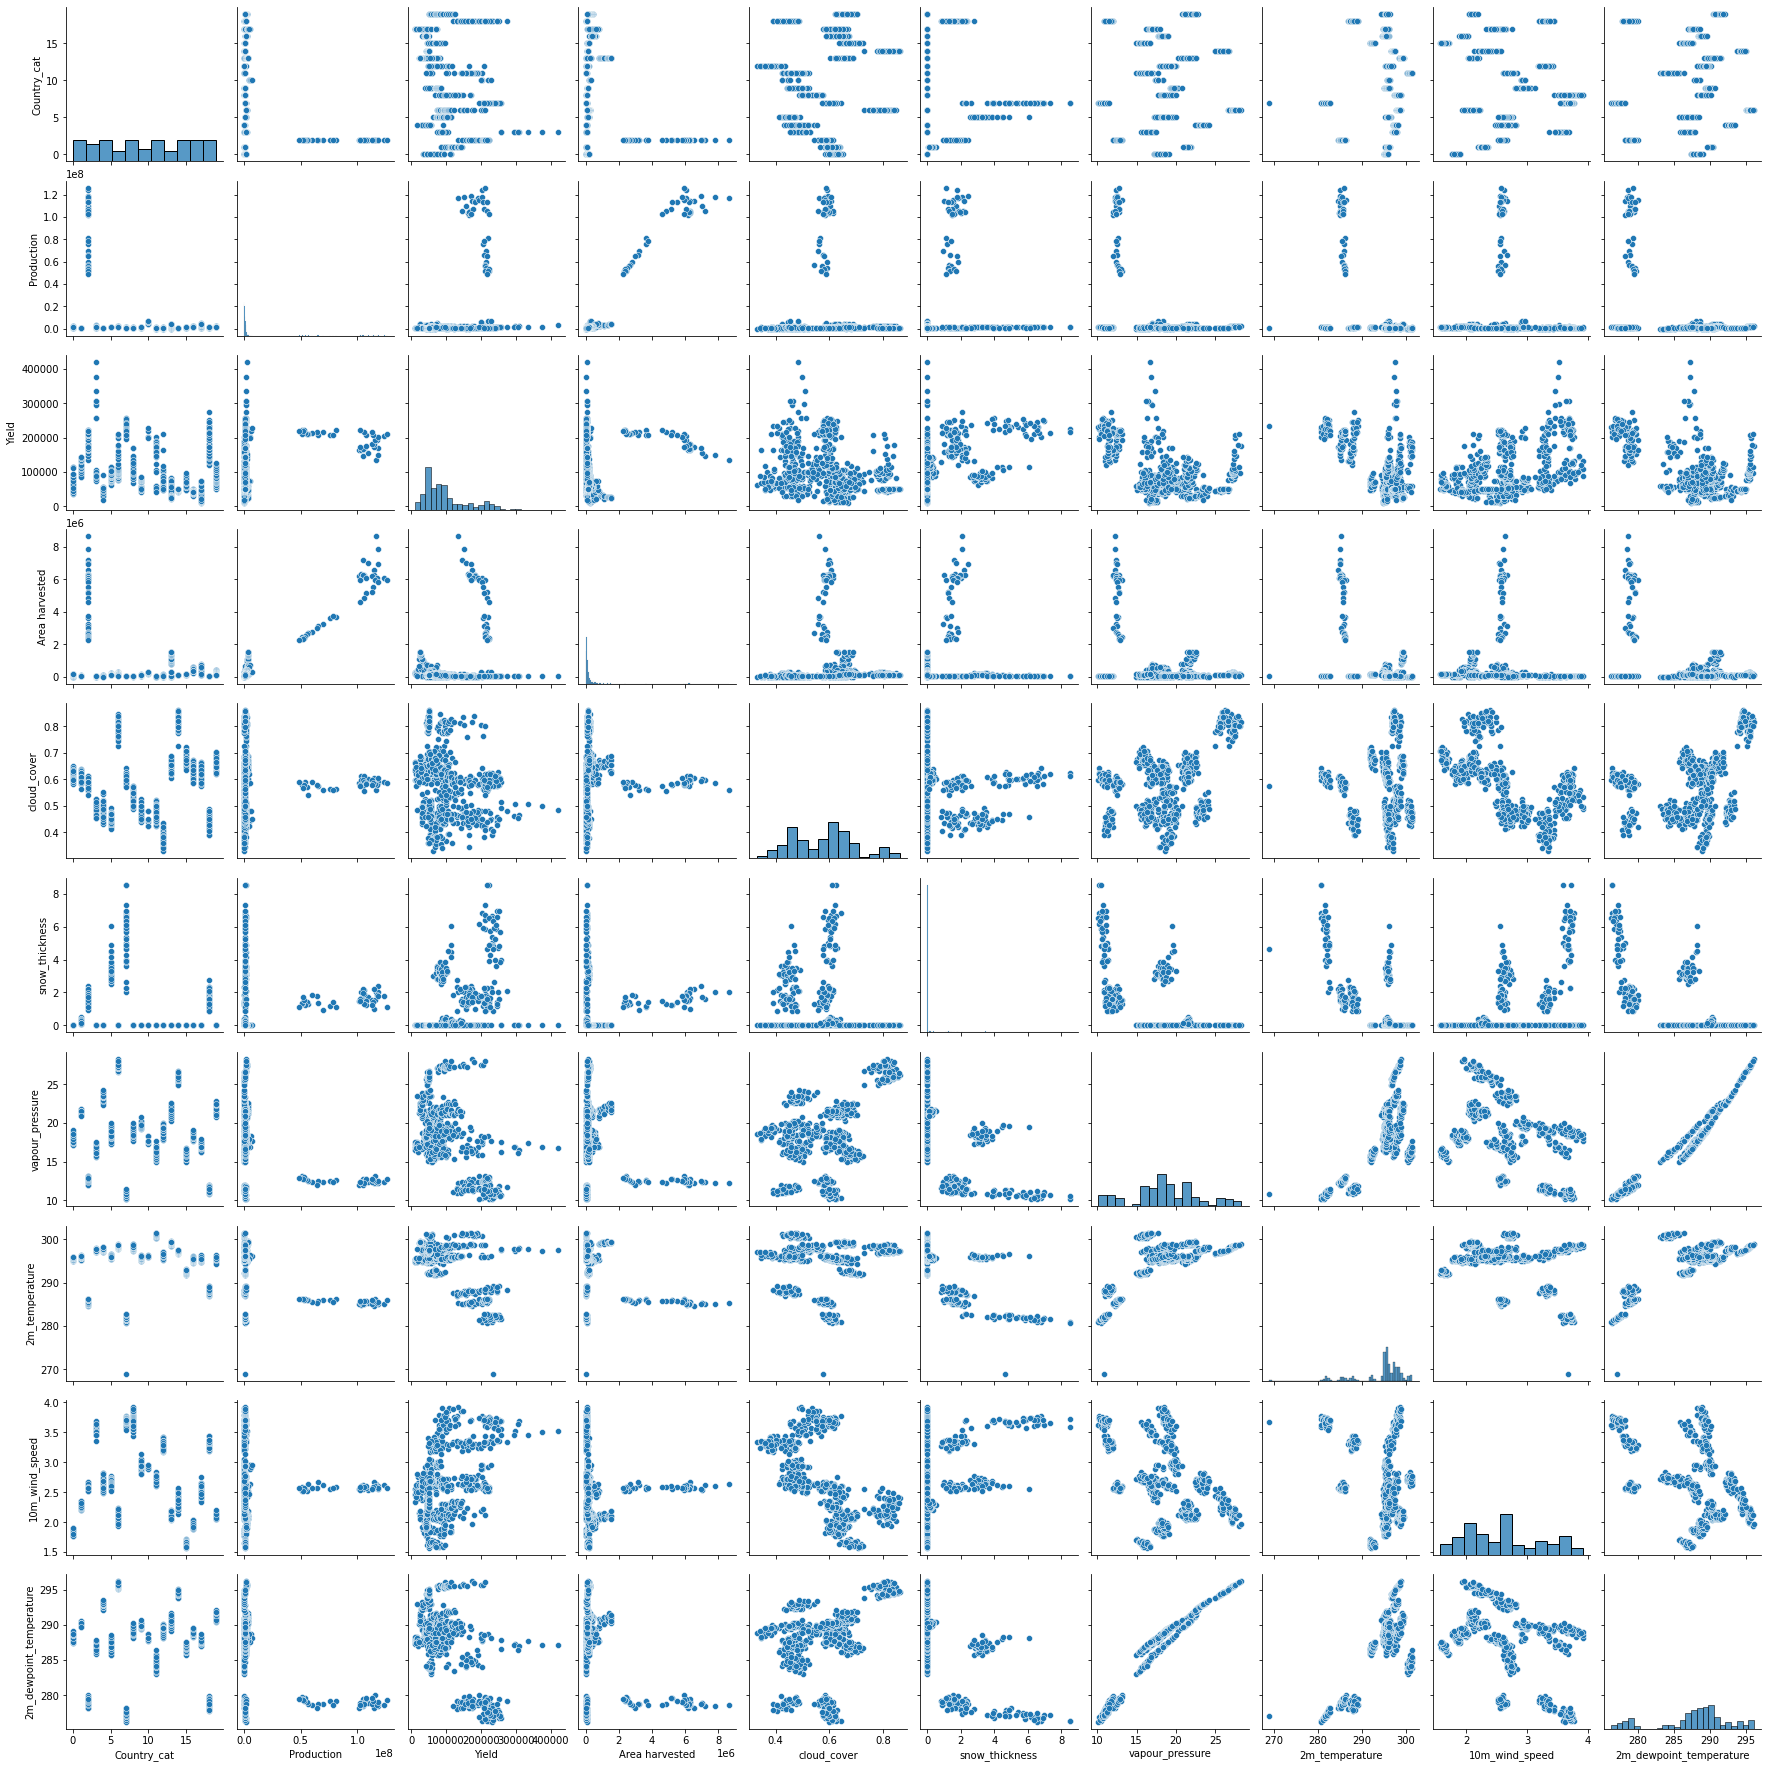

In [11]:
#Multivariate analysis using annual aggregates
plt.figure(figsize=(10,6))
sns.pairplot(df_country[x_vars])
plt.show()

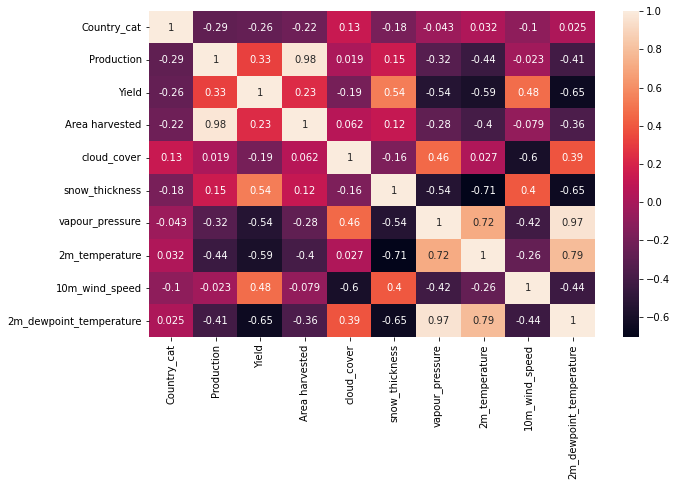

In [12]:
#Correlation map using annual aggregates
plt.figure(figsize=(10,6))
sns.heatmap(df_country[x_vars].corr(),annot=True)
plt.show()

Dropping vapor pressure from modeling analysis as highly correlated with 2m_dewpoint_temperature and dropping area harvested from modelling analysis as highly correlated with production

In [13]:
#function for inspecting all time trend of all variables
def get_all_time_variable_trends(country, variables, df):
    #create plot
    fig, axs = plt.subplots(nrows=len(variables), ncols=1)
    #add title
    fig.suptitle('Trends for '+country)
    #collect data from dataframe
    for i in range(len(variables)):
        var_x = []
        var_y = []    
        years = df_country.loc[df["Country"] == country, "Year"]
        for year in years:
            for month in list(['01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12']):
                var_x.append(month+str(year))
                var_y.append(df.loc[(df["Country"] == country) & (df["Year"] == year), variables[i]+"_"+month].iloc[0])
        #add data to plots
        axs[i].plot(var_x, var_y)
        axs[i].title.set_text(variables[i])
    plt.show()

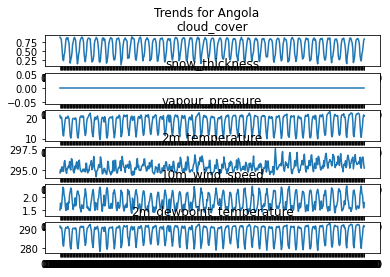

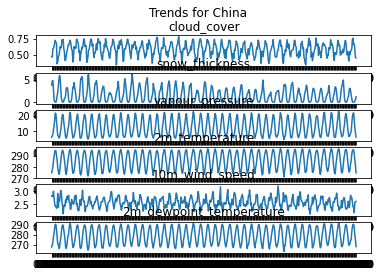

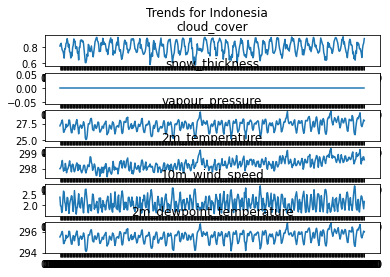

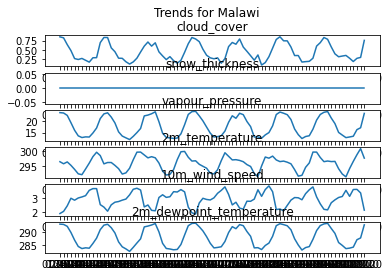

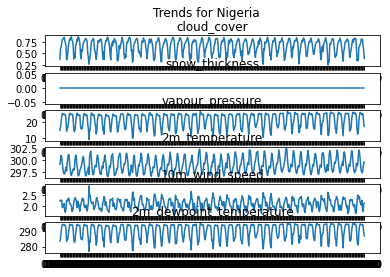

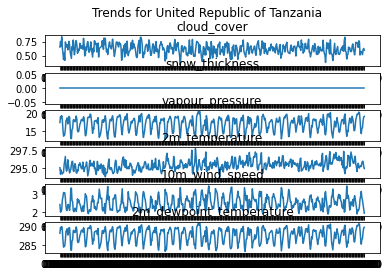

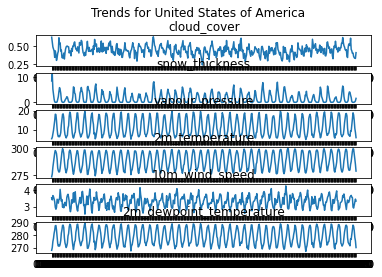

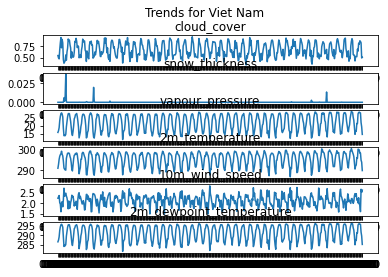

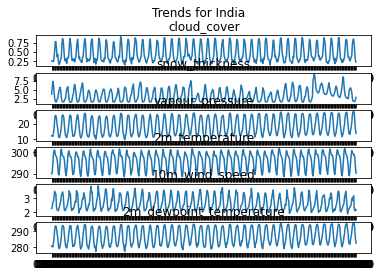

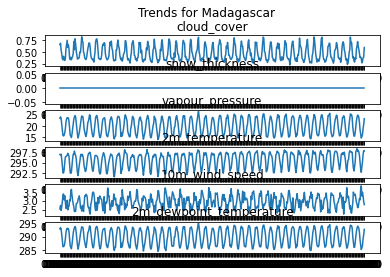

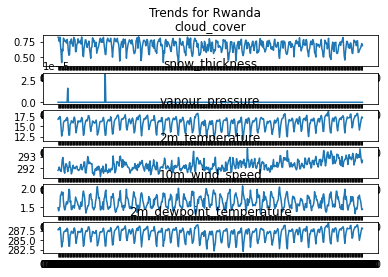

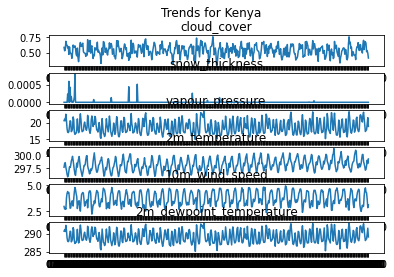

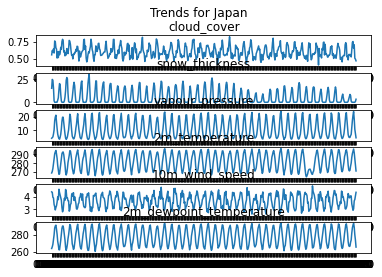

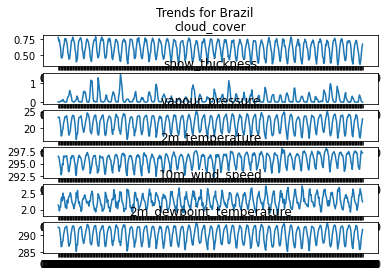

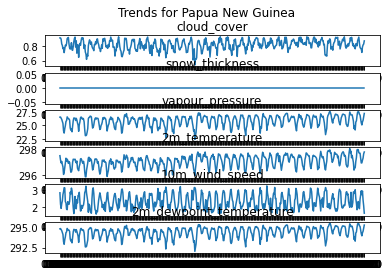

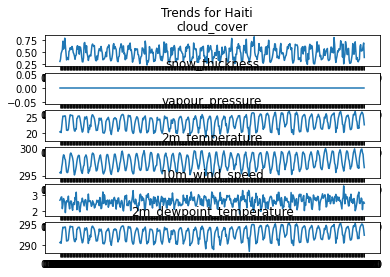

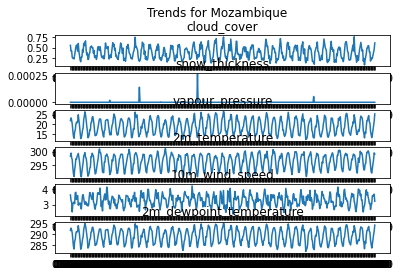

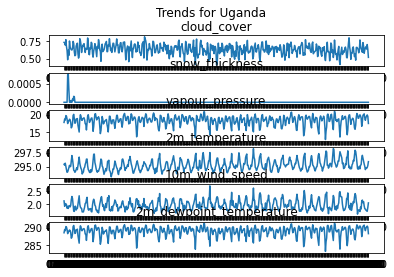

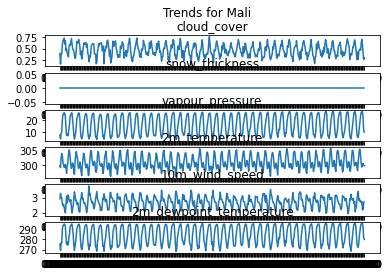

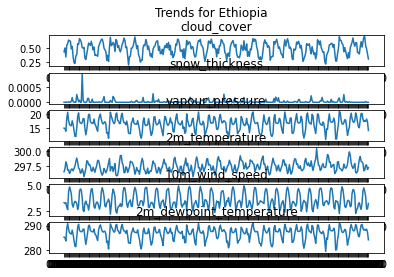

In [14]:
#inspecting all time trend of all variables for all countries
for country in list(countries["Country"]):
    get_all_time_variable_trends(country, variables, df_country)

In [15]:
# function for inspecting annual trend of all variables
def get_annual_variable_trends(country, year, variables, df):
    #create plot
    fig, axs = plt.subplots(nrows=len(variables), ncols=1)
    #add title
    fig.suptitle('Trends for '+country)
    #collect data from dataframe
    for i in range(len(variables)):
        var_x = []
        var_y = []    
        for month in list(['01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12']):
            var_x.append(month)
            var_y.append(df.loc[(df["Country"] == country) & (df["Year"] == year), variables[i]+"_"+month].iloc[0])
        #add data to plots
        axs[i].plot(var_x, var_y)
        axs[i].title.set_text(variables[i])
    plt.show()

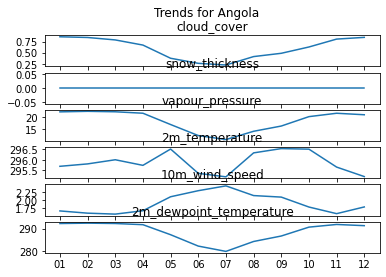

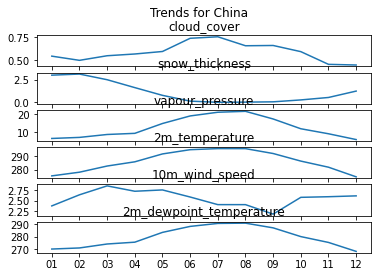

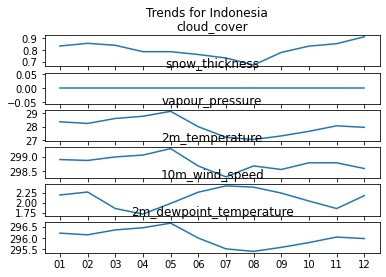

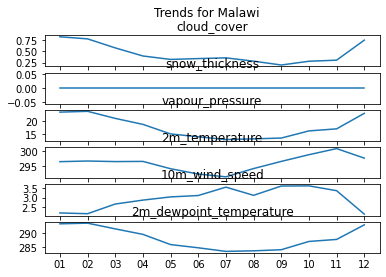

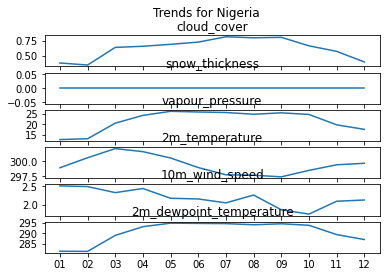

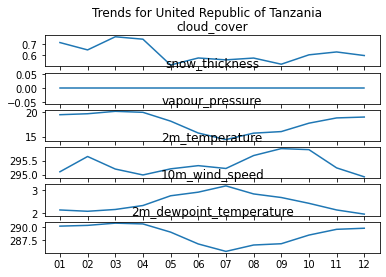

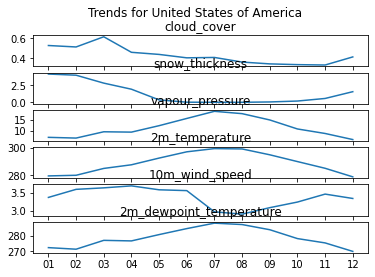

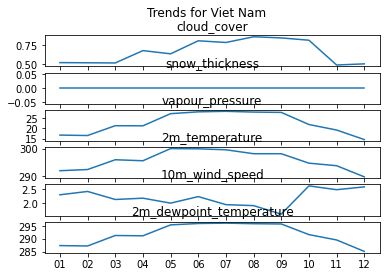

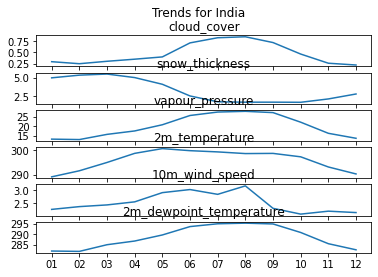

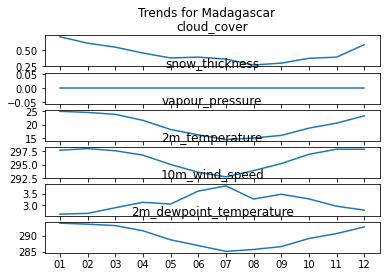

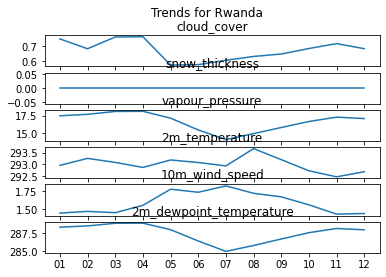

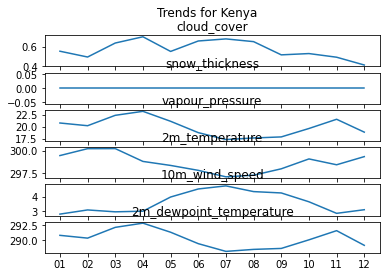

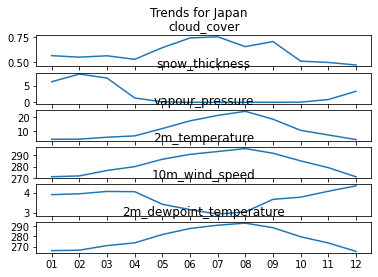

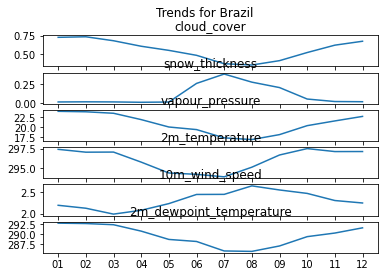

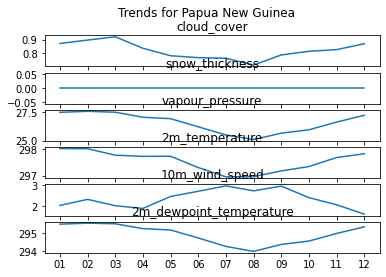

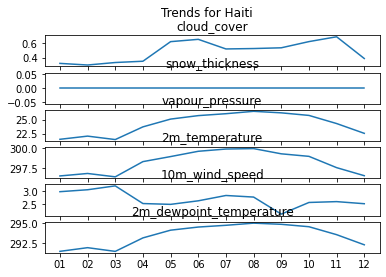

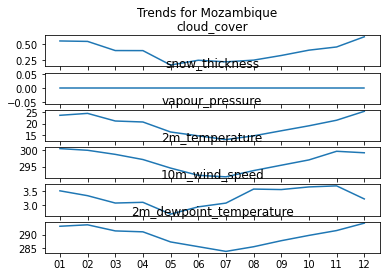

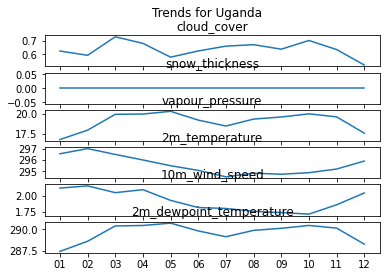

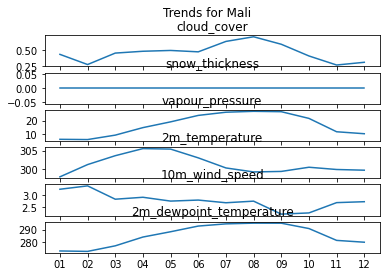

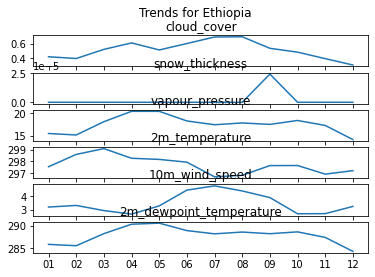

In [16]:
#inspecting annual trend of all variables for all countries in 2020
year = 2020
for country in list(countries["Country"]):
    get_annual_variable_trends(country, year, variables, df_country)

In [17]:
df_country.to_csv("climate_and_yield_data_by_country_for_modelling.csv", index = False)